## Getting Started

In [12]:
from neuralforecast.utils import AirPassengersDF

Y_df = AirPassengersDF # Defined in neuralforecast.utils
Y_df.head()

,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0


### Important:
* DataFrames must include all ['unique_id', 'ds', 'y'] columns. Make sure y column does not have missing or non-numeric values.

In [13]:
from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM, NHITS, RNN

In [14]:
horizon = 12

# Try different hyperparmeters to improve accuracy.
models = [LSTM(h=horizon,                    # Forecast horizon
               max_steps=500,                # Number of steps to train
               scaler_type='standard',       # Type of scaler to normalize data
               encoder_hidden_size=64,       # Defines the size of the hidden state of the LSTM
               decoder_hidden_size=64,),     # Defines the number of hidden units of each layer of the MLP decoder
          NHITS(h=horizon,                   # Forecast horizon
                input_size=2 * horizon,      # Length of input sequence
                max_steps=100,               # Number of steps to train
                n_freq_downsample=[2, 1, 1]) # Downsampling factors for each stack output
          ]
nf = NeuralForecast(models=models, freq='M')
nf.fit(df=Y_df)


Seed set to 1
Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MAE           | 0      | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | LSTM          | 50.4 K | train
4 | context_adapter | Linear        | 7.8 K  | train
5 | mlp_decoder     | MLP           | 769    | train
----------------------------------------------------------
59.0 K    Trainable params
0         Non-trainable params
59.0 K    Total params
0.236     Total estimated model params size (MB)


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

`Trainer.fit` stopped: `max_steps=500` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.4 M  | train
-------------------------------------------------------
2.4 M     Trainable params
0         Non-trainable params
2.4 M     Total params
9.769     Total estimated model params size (MB)


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

`Trainer.fit` stopped: `max_steps=100` reached.


In [15]:
Y_hat_df = nf.predict() #obtain the h forecasts after the training data Y_df.

/Users/mojtabaaskarzadeh/NeuralForecast/lib/python3.11/site-packages/utilsforecast/processing.py:382: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/mojtabaaskarzadeh/NeuralForecast/lib/python3.11/site-packages/utilsforecast/processing.py:436: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                                 …

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                                 …

/Users/mojtabaaskarzadeh/NeuralForecast/lib/python3.11/site-packages/neuralforecast/core.py:199: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [16]:
Y_hat_df

,ds,LSTM,NHITS
unique_id,,,
1.0,1961-01-31,430.598083,448.240448
1.0,1961-02-28,450.796326,437.499115
1.0,1961-03-31,462.560730,481.898010
1.0,1961-04-30,473.795441,501.486908
1.0,1961-05-31,512.449402,514.598633
1.0,1961-06-30,583.076782,597.040955
1.0,1961-07-31,626.696289,677.652771
1.0,1961-08-31,613.148438,677.809509
1.0,1961-09-30,528.241089,577.290588


In [17]:
Y_hat_df = Y_hat_df.reset_index()
Y_hat_df.head()

,unique_id,ds,LSTM,NHITS
0,1.0,1961-01-31,430.598083,448.240448
1,1.0,1961-02-28,450.796326,437.499115
2,1.0,1961-03-31,462.560730,481.898010
3,1.0,1961-04-30,473.795441,501.486908
4,1.0,1961-05-31,512.449402,514.598633


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

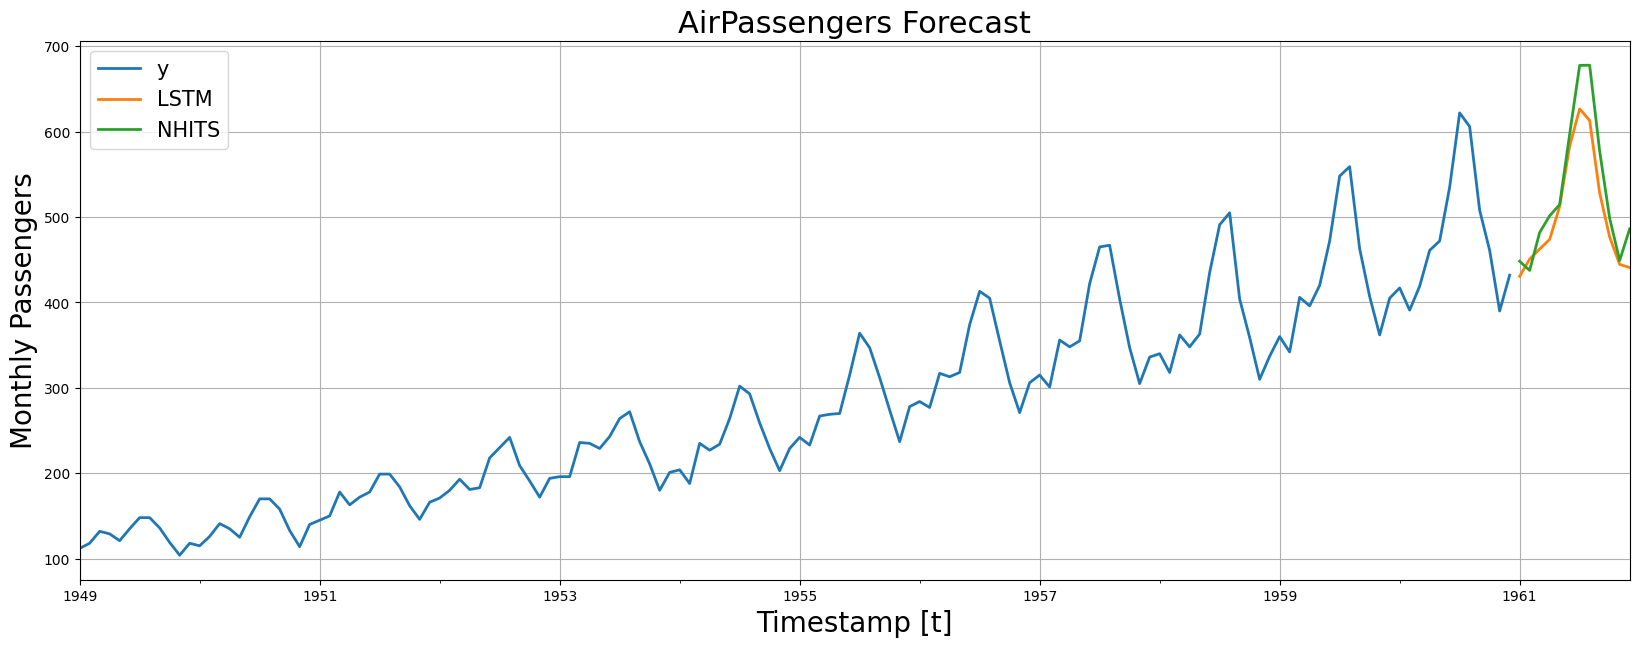

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df = pd.concat([Y_df, Y_hat_df]).set_index('ds') # Concatenate the train and forecast dataframes
plot_df[['y', 'LSTM', 'NHITS']].plot(ax=ax, linewidth=2)

ax.set_title('AirPassengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()


## Data Inputs

In [21]:
import pandas as pd
from datasetsforecast.m3 import M3

In [22]:
Y_df, *_ = M3.load('./data', group='Yearly')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.76M/1.76M [00:01<00:00, 1.68MiB/s]
INFO:datasetsforecast.utils:Successfully downloaded M3C.xls, 1757696, bytes.
/Users/mojtabaaskarzadeh/NeuralForecast/lib/python3.11/site-packages/datasetsforecast/m3.py:108: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  freq = pd.tseries.frequencies.to_offset(class_group.freq)


In [27]:
Y_df.groupby('unique_id').head(2)

,unique_id,ds,y
0,Y1,1975-12-31,940.66
1,Y1,1976-12-31,1084.86
20,Y10,1975-12-31,2160.04
21,Y10,1976-12-31,2553.48
40,Y100,1975-12-31,1424.70
...,...,...,...
18260,Y97,1976-12-31,1618.91
18279,Y98,1975-12-31,1164.97
18280,Y98,1976-12-31,1277.87
18299,Y99,1975-12-31,1870.00


## Exogenous Variables

* Static exogenous variables: The static exogenous variables carry time-invariant information for each time series. When the model is built with global parameters to forecast multiple time series, these variables allow sharing information within groups of time series with similar static variable levels. Examples of static variables include designators such as identifiers of regions, groups of products, etc.

* Historic exogenous variables: This time-dependent exogenous variable is restricted to past observed values. Its predictive power depends on Granger-causality, as its past values can provide significant information about future values of the target variable y

* Future exogenous variables: In contrast with historic exogenous variables, future values are available at the time of the prediction. Examples include calendar variables, weather forecasts, and known events that can cause large spikes and dips such as scheduled promotions.

In [37]:
df = pd.read_csv('https://datasets-nixtla.s3.amazonaws.com/EPF_FR_BE.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,unique_id,ds,y,gen_forecast,system_load,week_day
0,FR,2015-01-01 00:00:00,53.48,76905.0,74812.0,3
1,FR,2015-01-01 01:00:00,51.93,75492.0,71469.0,3
2,FR,2015-01-01 02:00:00,48.76,74394.0,69642.0,3
3,FR,2015-01-01 03:00:00,42.27,72639.0,66704.0,3
4,FR,2015-01-01 04:00:00,38.41,69347.0,65051.0,3


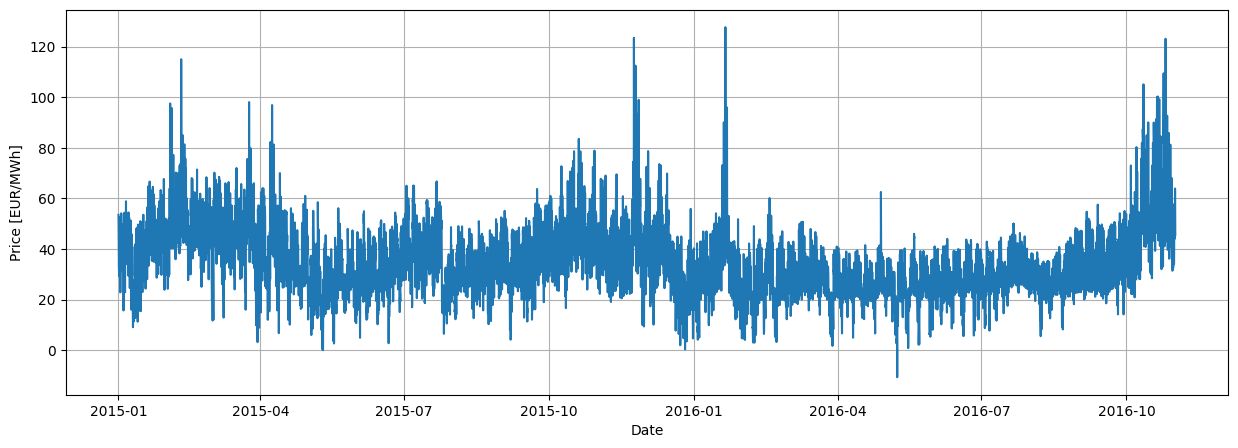

In [39]:
plt.figure(figsize=(15,5))
plt.plot(df[df['unique_id']=='FR']['ds'], df[df['unique_id']=='FR']['y'])
plt.xlabel('Date')
plt.ylabel('Price [EUR/MWh]')
plt.grid()

In [40]:
static_df = pd.read_csv('https://datasets-nixtla.s3.amazonaws.com/EPF_FR_BE_static.csv')
static_df.head()

,unique_id,market_0,market_1
0,FR,1,0
1,BR,0,1


In [41]:
from neuralforecast.auto import NHITS, BiTCN
from neuralforecast.core import NeuralForecast

import logging
logging.getLogger("pytorch_lightning").setLevel(logging.WARNING)

In [42]:
horizon = 24 # day-ahead daily forecast
models = [NHITS(h = horizon,
                input_size = 5*horizon,
                futr_exog_list = ['gen_forecast', 'week_day'], # <- Future exogenous variables
                hist_exog_list = ['system_load'], # <- Historical exogenous variables
                stat_exog_list = ['market_0', 'market_1'], # <- Static exogenous variables
                scaler_type = 'robust'),
          BiTCN(h = horizon,
                input_size = 5*horizon,
                futr_exog_list = ['gen_forecast', 'week_day'], # <- Future exogenous variables
                hist_exog_list = ['system_load'], # <- Historical exogenous variables
                stat_exog_list = ['market_0', 'market_1'], # <- Static exogenous variables
                scaler_type = 'robust',
                ),                
                ]


Seed set to 1
Seed set to 1


In [43]:
nf = NeuralForecast(models=models, freq='H')
nf.fit(df=df,
       static_df=static_df)


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

In [44]:
futr_df = pd.read_csv('https://datasets-nixtla.s3.amazonaws.com/EPF_FR_BE_futr.csv')
futr_df['ds'] = pd.to_datetime(futr_df['ds'])
futr_df.head()


,unique_id,ds,gen_forecast,week_day
0,FR,2016-11-01 00:00:00,49118.0,1
1,FR,2016-11-01 01:00:00,47890.0,1
2,FR,2016-11-01 02:00:00,47158.0,1
3,FR,2016-11-01 03:00:00,45991.0,1
4,FR,2016-11-01 04:00:00,45378.0,1


In [45]:
Y_hat_df = nf.predict(futr_df=futr_df)
Y_hat_df.head()

/Users/mojtabaaskarzadeh/NeuralForecast/lib/python3.11/site-packages/utilsforecast/processing.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/mojtabaaskarzadeh/NeuralForecast/lib/python3.11/site-packages/utilsforecast/processing.py:436: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


Predicting: |                                                                                                 …

Predicting: |                                                                                                 …

/Users/mojtabaaskarzadeh/NeuralForecast/lib/python3.11/site-packages/neuralforecast/core.py:199: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,NHITS,BiTCN
unique_id,,,
BE,2016-11-01 00:00:00,38.189274,39.709602
BE,2016-11-01 01:00:00,34.203503,35.961372
BE,2016-11-01 02:00:00,35.714977,33.699509
BE,2016-11-01 03:00:00,32.661095,31.063299
BE,2016-11-01 04:00:00,29.866228,30.491859


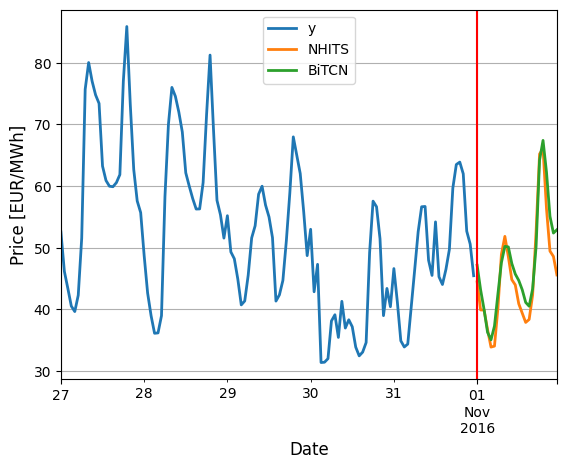

In [46]:
import matplotlib.pyplot as plt

plot_df = df[df['unique_id']=='FR'].tail(24*5).reset_index(drop=True)
Y_hat_df = Y_hat_df.reset_index(drop=False)
Y_hat_df = Y_hat_df[Y_hat_df['unique_id']=='FR']

plot_df = pd.concat([plot_df, Y_hat_df ]).set_index('ds') # Concatenate the train and forecast dataframes

plot_df[['y', 'NHITS', 'BiTCN']].plot(linewidth=2)
plt.axvline('2016-11-01', color='red')
plt.ylabel('Price [EUR/MWh]', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.grid()


## Time Series Scaling

The Neuralforecast library integrates two types of temporal scaling:

* Time Series Scaling: scaling each time series using all its data on the train set before start training the model. This is done by using the "local_scaler_type" parameter of the Neuralforecast core class. local_scaler_type parameter is used to specify the type of scaling to be used. In this case, we will use standard, which scales the data to have zero mean and unit variance.Other supported scalers are minmax, robust, robust-iqr, minmax, and boxcox.

* Window scaling (TemporalNorm): scaling each input window separetly for each element of the batch at every training iteration. This is done by using the "scaler_type" parameter of each model class. Temporal normalization is specified by the scaler_type argument. Currently, it is only supported for Windows-based models (NHITS, NBEATS, MLP, TimesNet, and all Transformers).

## Hyperparameter Optimization
The main steps of hyperparameter tuning are:

* 1- Define training and validation sets.
* 2- Define search space.
* 3- Sample configurations with a search algorithm, train models, and evaluate them on the validation set.
* 4- Select and store the best model.

In [47]:
from neuralforecast.utils import AirPassengersDF

Y_df = AirPassengersDF
Y_df.head()


,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0


In [48]:
#complete

## End to End Walkthrough
Outline:

* 1- Install packages.
* 2- Read the data.
* 3- Explore the data.
* 4- Train many models globally for the entire dataset.
* 5- Evaluate the model’s performance using cross-validation.
* 6- Select the best model for every unique time series.

The input to NeuralForecast is always a data frame in long format with three columns: unique_id, ds and y:

In [49]:
import pandas as pd

Y_df = pd.read_parquet('https://datasets-nixtla.s3.amazonaws.com/m4-hourly.parquet')

Y_df.head()


,unique_id,ds,y
0,H1,1,605.0
1,H1,2,586.0
2,H1,3,586.0
3,H1,4,559.0
4,H1,5,511.0


In [50]:
uids = Y_df['unique_id'].unique()[:10] # Select 10 ids to make the example faster
Y_df = Y_df.query('unique_id in @uids').reset_index(drop=True)


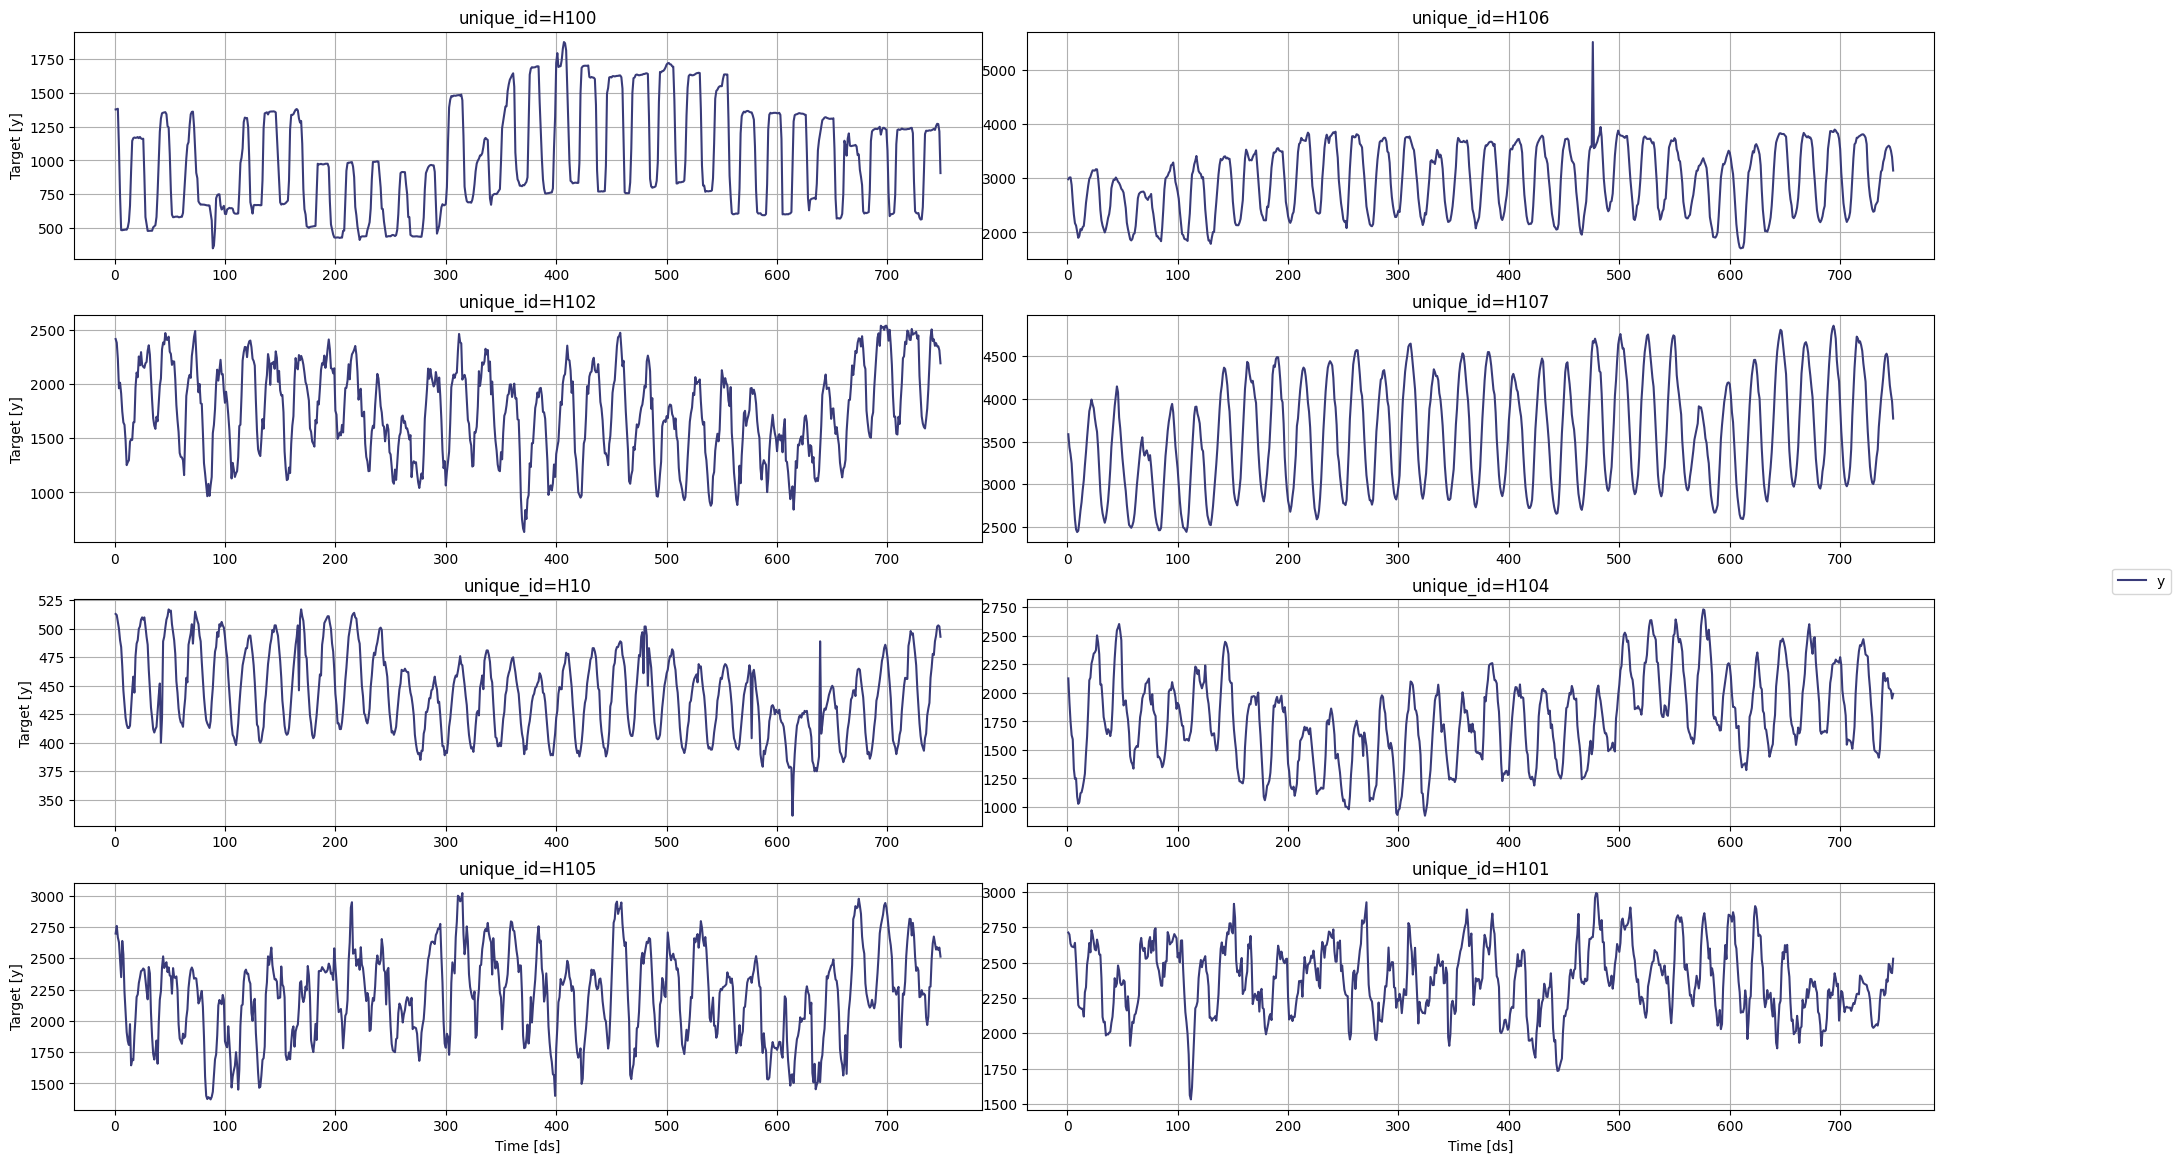

In [53]:
from statsforecast import StatsForecast

StatsForecast.plot(Y_df, engine='matplotlib')


In [55]:
from ray import tune

from neuralforecast import NeuralForecast
from neuralforecast.auto import AutoNHITS, AutoLSTM
from neuralforecast.losses.pytorch import MQLoss

In [56]:
config_nhits = {
    "input_size": tune.choice([48, 48*2, 48*3]),              # Length of input window
    "start_padding_enabled": True,
    "n_blocks": 5*[1],                                              # Length of input window
    "mlp_units": 5 * [[64, 64]],                                  # Length of input window
    "n_pool_kernel_size": tune.choice([5*[1], 5*[2], 5*[4],         
                                      [8, 4, 2, 1, 1]]),            # MaxPooling Kernel size
    "n_freq_downsample": tune.choice([[8, 4, 2, 1, 1],
                                      [1, 1, 1, 1, 1]]),            # Interpolation expressivity ratios
    "learning_rate": tune.loguniform(1e-4, 1e-2),                   # Initial Learning rate
    "scaler_type": tune.choice([None]),                             # Scaler type
    "max_steps": tune.choice([1000]),                               # Max number of training iterations
    "batch_size": tune.choice([1, 4, 10]),                          # Number of series in batch
    "windows_batch_size": tune.choice([128, 256, 512]),             # Number of windows in batch
    "random_seed": tune.randint(1, 20),                             # Random seed
}

config_lstm = {
    "input_size": tune.choice([48, 48*2, 48*3]),              # Length of input window
    "encoder_hidden_size": tune.choice([64, 128]),            # Hidden size of LSTM cells
    "encoder_n_layers": tune.choice([2,4]),                   # Number of layers in LSTM
    "learning_rate": tune.loguniform(1e-4, 1e-2),             # Initial Learning rate
    "scaler_type": tune.choice(['robust']),                   # Scaler type
    "max_steps": tune.choice([500, 1000]),                    # Max number of training iterations
    "batch_size": tune.choice([1, 4]),                        # Number of series in batch
    "random_seed": tune.randint(1, 20),                       # Random seed
}


In [59]:
nf = NeuralForecast(
    models=[
        AutoNHITS(h=48, config=config_nhits, loss=MQLoss(), num_samples=5),
        AutoLSTM(h=48, config=config_lstm, loss=MQLoss(), num_samples=2),
    ],
    freq=1
)


In [63]:
nf.fit(df=Y_df)

2024-07-11 18:23:20,386	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/Users/mojtabaaskarzadeh/ray_results/_train_tune_2024-07-11_18-21-56' in 0.0072s.
Seed set to 19


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

In [64]:
fcst_df = nf.predict()
fcst_df.columns = fcst_df.columns.str.replace('-median', '')
fcst_df.head()


Predicting: |                                                                                                 …

Predicting: |                                                                                                 …

/Users/mojtabaaskarzadeh/NeuralForecast/lib/python3.11/site-packages/neuralforecast/core.py:199: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoNHITS,AutoNHITS-lo-90,AutoNHITS-lo-80,AutoNHITS-hi-80,AutoNHITS-hi-90,AutoLSTM,AutoLSTM-lo-90,AutoLSTM-lo-80,AutoLSTM-hi-80,AutoLSTM-hi-90
unique_id,,,,,,,,,,,
H1,749,609.043335,585.298401,587.460693,633.940552,639.883362,634.893555,370.960968,410.125458,858.782715,909.539795
H1,750,563.237793,523.454834,534.821777,601.352295,603.673340,636.415039,369.958405,409.850403,859.047180,911.949097
H1,751,519.375793,476.606201,491.010742,557.670410,567.840027,636.997498,368.991699,409.540863,856.741577,908.930481
H1,752,483.318756,444.521240,449.626007,522.086243,539.916199,636.170349,371.958801,411.236267,858.380188,909.977661
H1,753,452.072205,408.581482,418.445282,499.979980,522.429199,635.953003,370.579041,409.074738,857.252197,906.927673


/Users/mojtabaaskarzadeh/NeuralForecast/lib/python3.11/site-packages/statsforecast/core.py:1386: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


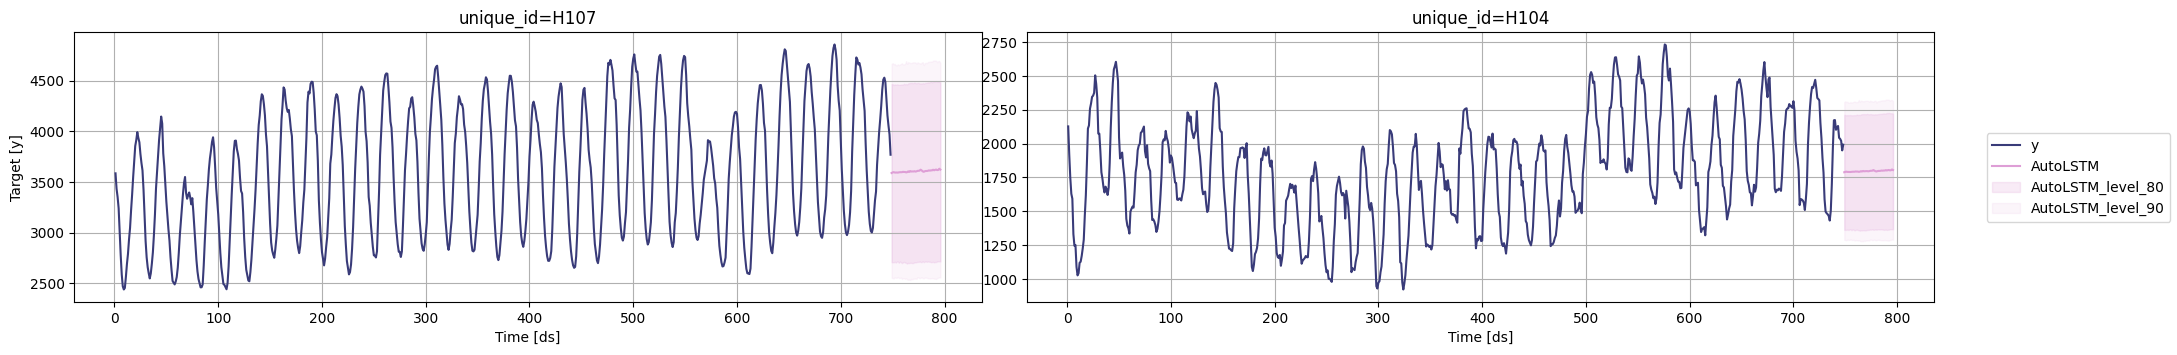

In [65]:
# Plot to unique_ids and some selected models
StatsForecast.plot(Y_df, fcst_df, models=["AutoLSTM"], unique_ids=["H107", "H104"], level=[80, 90], engine='matplotlib')


In [66]:
cv_df = nf.cross_validation(Y_df, n_windows=2)


2024-07-11 18:31:36,760	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/Users/mojtabaaskarzadeh/ray_results/_train_tune_2024-07-11_18-30-12' in 0.0073s.
Seed set to 19


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Predicting: |                                                                                                 …

/Users/mojtabaaskarzadeh/NeuralForecast/lib/python3.11/site-packages/neuralforecast/core.py:199: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [67]:
cv_df.columns = cv_df.columns.str.replace('-median', '')


In [68]:
cv_df.head()


,ds,cutoff,AutoNHITS,AutoNHITS-lo-90,AutoNHITS-lo-80,AutoNHITS-hi-80,AutoNHITS-hi-90,AutoLSTM,AutoLSTM-lo-90,AutoLSTM-lo-80,AutoLSTM-hi-80,AutoLSTM-hi-90,y
unique_id,,,,,,,,,,,,,
H1,700,699,685.295044,644.736084,658.278320,712.894043,731.003784,630.867126,366.886810,406.936035,871.372742,931.329712,684.0
H1,701,699,622.862183,573.948303,586.768738,660.559753,680.601257,630.472595,367.180939,407.131836,870.217590,935.021362,619.0
H1,702,699,567.278381,514.121216,526.130676,598.832214,624.713562,630.961487,365.434906,405.688843,871.137756,931.869263,565.0
H1,703,699,511.361389,455.521118,463.456238,546.424988,571.797607,630.501282,366.499603,406.084625,873.100830,934.414612,532.0
H1,704,699,461.004578,413.497772,424.918884,506.853027,531.700256,631.405457,363.420929,404.785919,873.695129,933.307739,495.0


In [69]:
for cutoff in cv_df['cutoff'].unique():
    StatsForecast.plot(
        Y_df, 
        cv_df.query('cutoff == @cutoff').drop(columns=['y', 'cutoff']), 
        max_insample_length=48 * 4, 
        unique_ids=['H185'],
        engine='matplotlib'
    )


/Users/mojtabaaskarzadeh/NeuralForecast/lib/python3.11/site-packages/statsforecast/core.py:1386: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(
/Users/mojtabaaskarzadeh/NeuralForecast/lib/python3.11/site-packages/statsforecast/core.py:1386: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


In [70]:
from datasetsforecast.losses import mse, mae, rmse
from datasetsforecast.evaluation import accuracy


In [71]:
evaluation_df = accuracy(cv_df, [mse, mae, rmse], agg_by=['unique_id'])
evaluation_df['best_model'] = evaluation_df.drop(columns=['metric', 'unique_id']).idxmin(axis=1)
evaluation_df.head()


SchemaError: pandas like datafame index can't have name